In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor , Pool
import shap


In [ ]:
df= pd.read_csv('../csv/after_cleaning/mubawab_tayara_menzili_final.csv')
df.head()
print(df.shape)

(6001, 11)


**train test split**

NOTE: Gradient Boosting Machines (XGBoost, LightGBM, CatBoost) – work well without scaling, as they rely on decision trees.


In [6]:
X= df.drop(columns='prix')

y= df['prix']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

# catBoost

Catboost is a high-performance gradient-boosting technique made for machine learning tasks, especially in situations involving structured input. Gradient boosting, an ensemble learning technique, forms the basis of its main workings. Catboost begins by speculating, frequently the mean of the target variable. The ensemble of decision trees is then gradually built, with each tree seeking to eliminate the errors or residuals from the previous ones. Catboost stands out because of how well it handles category features. Catboost uses a method termed “ordered boosting” to process categorical data directly, resulting in faster training and better model performance.

Additionally, regularization techniques are incorporated to avoid overfitting. Catboost integrates the predictions from all the trees when making predictions, creating models that are extremely accurate and reliable. Additionally, it offers feature relevance rankings that help with feature selection and comprehension of model choices. Catboost is a useful tool for a variety of machine-learning tasks, such as classification, regressions, etc.



In [7]:
model = CatBoostRegressor(task_type='GPU', iterations=1000, depth=16, loss_function='RMSE') 

train_pool = Pool(X_train, label=y_train)
test_pool = Pool(X_test, label=y_test)

model.fit(train_pool, verbose=100)

pred= model.predict(test_pool)

Learning rate set to 0.049608
0:	learn: 350268.3369466	total: 2.37s	remaining: 39m 27s
100:	learn: 188908.4717640	total: 22.3s	remaining: 3m 18s
200:	learn: 184294.3792564	total: 32.1s	remaining: 2m 7s
300:	learn: 180838.5739524	total: 56.3s	remaining: 2m 10s
400:	learn: 176116.0727744	total: 1m 37s	remaining: 2m 25s
500:	learn: 174147.8318040	total: 2m 5s	remaining: 2m 4s
600:	learn: 170604.9253654	total: 2m 51s	remaining: 1m 53s
700:	learn: 169441.9940405	total: 3m 19s	remaining: 1m 25s
800:	learn: 168564.8479834	total: 3m 46s	remaining: 56.2s
900:	learn: 166501.6600230	total: 4m 20s	remaining: 28.7s
999:	learn: 164680.0809314	total: 4m 55s	remaining: 0us


In [ ]:
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
mape=mean_absolute_percentage_error(y_test, pred)
r2 = r2_score(y_test, pred)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R²: {r2}")

Mean Absolute Error (MAE): 102611.8012113771
Root Mean Squared Error (RMSE): 165473.5835841521
Mean Squared Error (MSE): 27381506864.181374
Mean Absolute Percentage Error (MAPE): 0.27978653447648766
R²: 0.7709484271682292


In [10]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Train metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Test metrics
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Display results
print("===== Training Metrics =====")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_train:.4f}")
print(f"R²: {r2_train:.4f}")

print("\n===== Testing Metrics =====")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test:.4f}")
print(f"R²: {r2_test:.4f}")


===== Training Metrics =====
Mean Absolute Error (MAE): 87721.7458
Root Mean Squared Error (RMSE): 164680.0992
Mean Squared Error (MSE): 27119535056.5828
Mean Absolute Percentage Error (MAPE): 0.2376
R²: 0.7925

===== Testing Metrics =====
Mean Absolute Error (MAE): 102611.8012
Root Mean Squared Error (RMSE): 165473.5836
Mean Squared Error (MSE): 27381506864.1814
Mean Absolute Percentage Error (MAPE): 0.2798
R²: 0.7709


**R² is around 78% , this means the model explains about 78% of the variance in apartment prices.
The higher the R², the better the model’s fit to the data.**

Learning rate set to 0.048179
0:	learn: 347682.6720069	total: 469ms	remaining: 7m 48s
1:	learn: 337621.4859261	total: 508ms	remaining: 4m 13s
2:	learn: 328171.7643268	total: 546ms	remaining: 3m 1s
3:	learn: 319267.8626207	total: 660ms	remaining: 2m 44s
4:	learn: 311218.9659071	total: 675ms	remaining: 2m 14s
5:	learn: 303701.5802940	total: 688ms	remaining: 1m 53s
6:	learn: 296355.8138760	total: 751ms	remaining: 1m 46s
7:	learn: 289571.9343454	total: 777ms	remaining: 1m 36s
8:	learn: 283128.5776001	total: 990ms	remaining: 1m 48s
9:	learn: 277092.9777741	total: 1.03s	remaining: 1m 41s
10:	learn: 271514.7634144	total: 1.14s	remaining: 1m 42s
11:	learn: 266329.3142499	total: 1.17s	remaining: 1m 36s
12:	learn: 261861.9816336	total: 1.18s	remaining: 1m 29s
13:	learn: 257299.5197902	total: 1.22s	remaining: 1m 25s
14:	learn: 252975.4039248	total: 1.26s	remaining: 1m 22s
15:	learn: 249149.3745559	total: 1.27s	remaining: 1m 18s
16:	learn: 245425.0517482	total: 1.34s	remaining: 1m 17s
17:	learn: 2

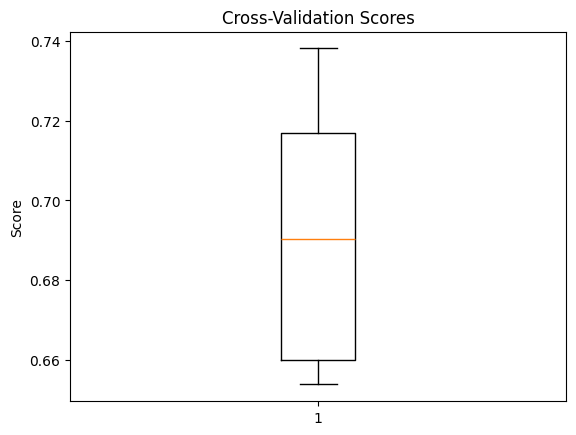

Average CV Score: 0.6918383322506202


In [25]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Plotting the cross-validation scores
plt.boxplot(cv_scores)
plt.title('Cross-Validation Scores')
plt.ylabel('Score')
plt.show()

print(f'Average CV Score: {cv_scores.mean()}')


**feature importance**

In [11]:
print(model.get_feature_importance(prettified=True))

               Feature Id  Importances
0              superficie    47.186076
1              delegation    14.292140
2                chambres    10.686716
3       gouvernorat_tunis     7.600327
4          salle_de_bains     6.204906
5               nb_pieces     5.902148
6                   etage     5.799138
7   gouvernorat_ben-arous     1.300972
8      gouvernorat_ariana     0.892865
9  gouvernorat_la-manouba     0.134712


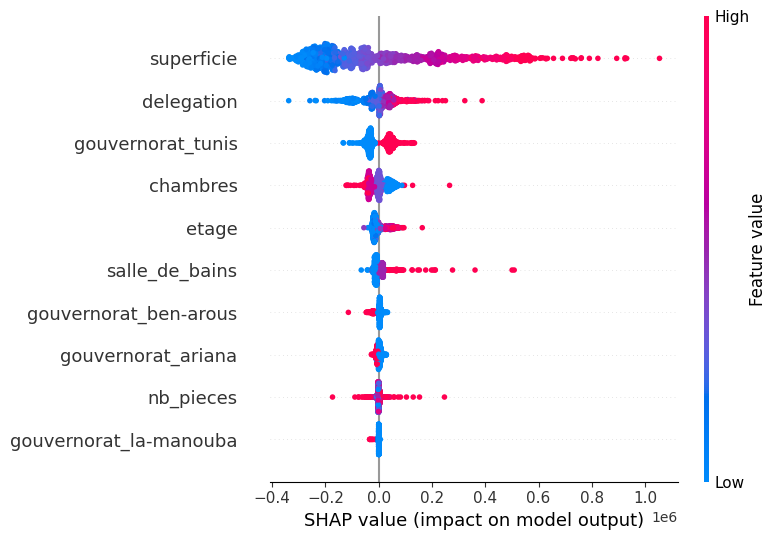

In [12]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


In [13]:
print(model.get_params())


{'iterations': 1000, 'depth': 16, 'loss_function': 'RMSE', 'task_type': 'GPU'}


**learning curve**

In [14]:
# Evaluate the model using CatBoost's precision
results = model.eval_metrics(test_pool, 
                             metrics=['RMSE', 'MAE', 'MAPE', 'R2'], 
                             plot=True)

print(results.keys())
# Plot training vs validation loss


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

dict_keys(['RMSE', 'MAE', 'MAPE', 'R2'])


**Compress model**

In [18]:

model.save_model("./compressed_models/catboost_model.cbm")

In [20]:
loaded_model = CatBoostRegressor().load_model("./compressed_models/catboost_model.cbm", format="cbm")

In [22]:
loaded_model.predict(test_pool)

array([ 290189.01751647,  364849.14240299,  312152.87945728, ...,
       1062474.89920241,  914420.58059645,  167083.39154414])